In [1]:
import pandas as pd
import numpy as np
import glob

In [2]:
annotation_file = '/home/sagiv/Documents/ITC/final_smoking/Datasets/poses/in/labels.csv'
proximity_dir = '/home/sagiv/Documents/ITC/final_smoking/Datasets/poses/out/proximity/'

In [3]:
columns = ['class','video','set','start','end','label']
annot = pd.read_csv(annotation_file,header = None)
annot.columns= columns

In [4]:
import re

path_list = glob.glob(proximity_dir + '/*.pickle')
regex = r"[\S]*v_(?P<filename>[\S]*)_(?P<start>[\d]*)_(?P<end>[\d]*)_data.pickle$"
video_details = [re.split(regex, row)[1:-1] for row in path_list]

In [5]:
import pickle

def load_proximities(proximity_dir):
    names=[]
    path_list = glob.glob(proximity_dir + '/*.pickle')
    df_proximity = np.zeros(shape=(1,3024))
    for path in path_list:
        with open(path,'rb') as f:
            tmp = pickle.load(f).reshape(-1)
            video_name = re.split(regex, path)[1:-1]
            if len(tmp) == 3024:
                df_proximity = np.concatenate((df_proximity,tmp.reshape(1,-1)))
    return df_proximity,names

In [9]:
proxis,names = load_proximities(proximity_dir)

In [10]:
proxis.shape

(261, 3024)

In [11]:
names

[]

In [12]:
tmp= annot.set_index('video')

In [13]:
sum(annot.video.str.match('yebHYkXlqKY'))

0

In [45]:

with open(p,'rb') as f:
    df_proximity = pickle.load(f).reshape(1,-1)
with open(p,'rb') as f:
    df_proximity = np.concatenate((df_proximity,pickle.load(f).reshape(1,-1)))
    


In [6]:
import glob
import os
import pandas as pd


df = pd.read_csv(annotation_file, header=None)
df.columns = ['category', 'video', 'set', 'start', 'end', 'label']

# helper functions
def compose_vid_name(row):
    name = '_'.join(['v', row['video'], str(int(row['start'])), str(int(row['end']))])
    return name

def compose_folder_list(folder, filetype):
    filelist = [os.path.basename(f) for f in glob.glob(folder + r'/*.' + filetype)]
    return ','.join(filelist)


# main function
def check_if_in_folder(df, category, data_folder, filetype):
    ''' given labels df, category name, data folder such proximity, tracks, etc.
    and filetype such as 'pkl', 'csv', 'mp4 , etc.' '''
    subset = df.loc[df.category == category, :]
    names = subset.apply(compose_vid_name, axis=1)
    filelist = compose_folder_list(data_folder, filetype)
    good_vids = []
    labels = []
    for name, label in zip(names, subset.label.values):
        if name in filelist:
            good_vids.append(name)
            labels.append(label)
    return good_vids, labels


# test
vids, lbs = check_if_in_folder(df, 'Doing kickboxing', '/home/sagiv/Documents/ITC/final_smoking/Datasets/poses/out/proximity/',
                                   'pickle')

In [7]:
df_proximity = np.zeros(shape=(1,612))
df_variance = np.zeros(shape=(1,36))
lbs = []
for category in ['Doing karate','Doing kickboxing']:
    vids, lbs_tmp = check_if_in_folder(df, category, proximity_dir,
                                   'pickle')
    for vid,lb in zip(vids,lbs_tmp):
        path  = proximity_dir+ vid + '_data.pickle'
        with open(path,'rb') as f:
            tmp = pickle.load(f)
            if tmp.shape[0] < 17:
                continue
            for i in range(0,tmp.shape[2],6):
                self_proximity = tmp[-17:,i:i+6,i:i+6]
                self_var = np.var(self_proximity,axis=0)
                df_proximity = np.concatenate((df_proximity,self_proximity.reshape(1,-1)))
                df_variance = np.concatenate((df_variance,self_var.reshape(1,-1)))
                lbs.append(lb)

In [8]:
df_variance.shape

(275, 36)

In [9]:
X= df_variance
X = np.delete(X,0,0)
X[np.isnan(X)] = np.nanmax(X)

In [10]:
from sklearn.decomposition import PCA

In [21]:
pca = PCA(n_components=3)
pca.fit(X)
X_pc = pca.transform(X)

In [22]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

No handles with labels found to put in legend.


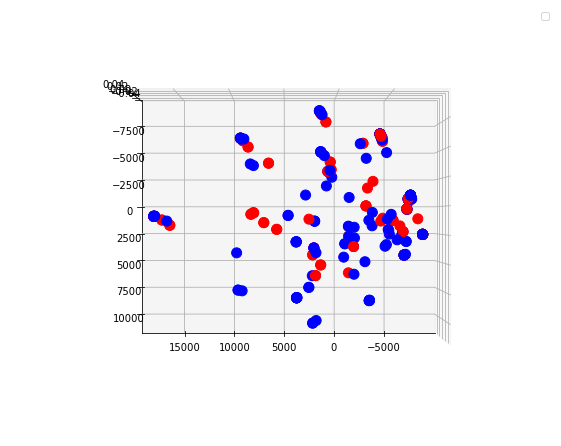

In [24]:
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=90, azim=90)
ax.scatter(X_pc[:,0],X_pc[:,1],c=["r" if i==1 else "b" for i in lbs],s=100)
plt.legend()

<BarContainer object of 36 artists>

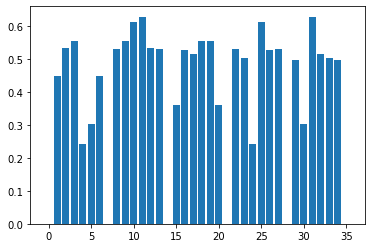

In [23]:
plt.bar([i for i in range(len(pca.components_[0]))],height = abs( pca.components_[0])+abs( pca.components_[1])+abs( pca.components_[2]))

In [24]:
comps = [abs(component.reshape(-1,6,6)).sum(axis=0) for component in pca.components_]

Text(0.5, 1.0, 'Object 1 self-proximity variance')

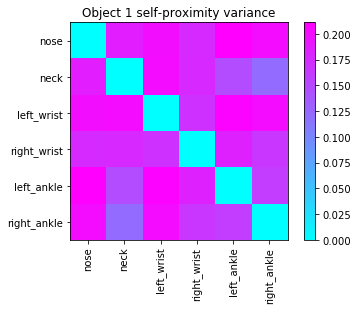

In [26]:
ax = plt.imshow(comps[0],cmap = 'cool')
plt.colorbar()
DANGER_JOINTS = ['nose', 'neck', 'left_wrist', 'right_wrist', 'left_ankle', 'right_ankle']
labels = [DANGER_JOINTS[i % len(DANGER_JOINTS)] for i in range(6)]

plt.yticks(range(len(labels)),labels)
plt.xticks(range(len(labels)),labels,rotation = 90);
plt.title('Object 1 self-proximity variance')

In [176]:
["r" if i==1 else "b" for i in lbs]

['r',
 'r',
 'r',
 'r',
 'r',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'r',
 'b',
 'b',
 'b',
 'r']

In [181]:
df_proximity[0,:]

ValueError: cannot delete array elements

In [27]:
self_proximity

array([[[  0.        ,  53.90732789, 118.11858448,          nan,
                  nan,          nan],
        [ 53.90732789,   0.        , 119.03780912,          nan,
                  nan,          nan],
        [118.11858448, 119.03780912,   0.        ,          nan,
                  nan,          nan],
        [         nan,          nan,          nan,   0.        ,
           0.        ,   0.        ],
        [         nan,          nan,          nan,   0.        ,
           0.        ,   0.        ],
        [         nan,          nan,          nan,   0.        ,
           0.        ,   0.        ]],

       [[  0.        ,  54.67174773, 116.7647207 ,          nan,
                  nan,          nan],
        [ 54.67174773,   0.        , 118.46096403,          nan,
                  nan,          nan],
        [116.7647207 , 118.46096403,   0.        ,          nan,
                  nan,          nan],
        [         nan,          nan,          nan,   0.        ,
      

In [185]:
tp = np.delete(X,0,0)

In [29]:
path_list[0]

'/home/sagiv/Documents/ITC/final_smoking/Datasets/poses/out/proximity/v_OG_OWHeIG_0_35_37_data.pickle'

In [30]:
with open(path_list[0],'rb') as f:
            tmp = pickle.load(f)

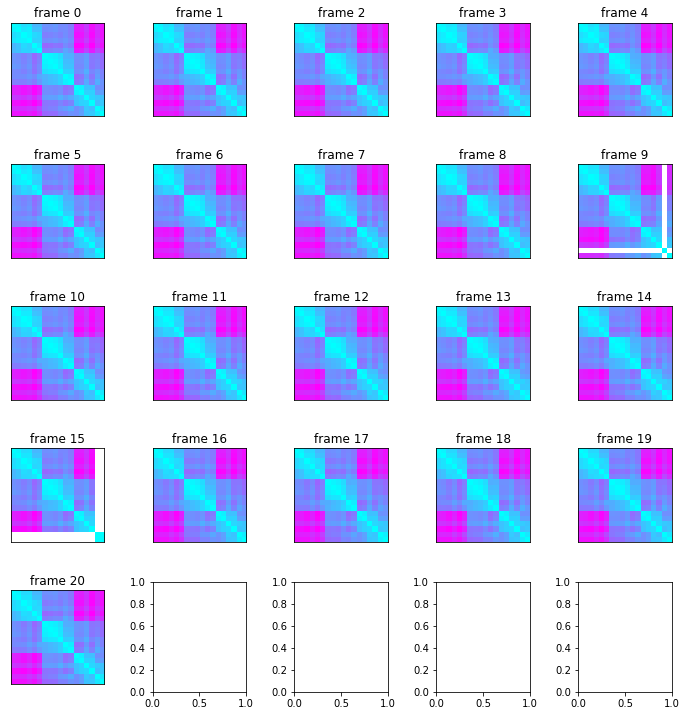

In [43]:
f, ax = plt.subplots(5,5,figsize=(10,10))
ax=ax.ravel()
plt.tight_layout()
for i,frame in enumerate(tmp):
    ax[i].imshow(frame,cmap = 'cool')
    ax[i].set_xticks([], [])
    ax[i].set_yticks([], [])
#     DANGER_JOINTS = ['nose', 'neck', 'left_wrist', 'right_wrist', 'left_ankle', 'right_ankle']
#     labels = [DANGER_JOINTS[i % len(DANGER_JOINTS)] for i in range(frame.shape[1])]

#     ax[i].set_yticks(range(len(labels)),labels)
#     ax[i].set_xticks(range(len(labels)),labels);
    ax[i].set_title('frame ' + str(i))

In [220]:
from scipy.interpolate import griddata

In [222]:
points = np.argwhere(~np.isnan(tmp))
values = tmp[points]

In [281]:
for i in range(0,12,6):
    print(tmp[:,i:i+6,i:i+6].shape)

(21, 6, 6)
(21, 6, 6)


In [277]:
tmp.shape[2]

12

In [224]:
griddata(points,values,tmp.shape,method='linear')

array([[[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]],

       [[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
        [nan, nan,

In [221]:
np.argwhere(~np.isnan(tmp))

array([[ 0,  0,  0],
       [ 0,  0,  1],
       [ 0,  0,  2],
       ...,
       [20, 11,  9],
       [20, 11, 10],
       [20, 11, 11]])

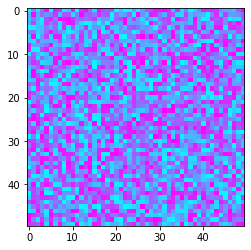

In [274]:
ax = plt.imshow(np.random.random((50,50)),cmap = 'cool')